## **Задача 1**

Напишите программу для интерполирования данных на основе интерполяции в форме Лагранжа
для функции $$f(x) = (1 + 25x^2)^{−1}$$ на интервале [−1, 1]. Рассмотреть случаи n = 4, 6, 10, где n - количество узлов.

1. Построить график исходной функции

2. Построить график полученного интерполяционного многочлена для всех рассмотренных случаев n.

3. Построить интерполяционный многочлен в форме Ньютона, где в качестве узлов взяты нули полинома Чебышева, которые расчитываются по формуле

$$x_k = \frac{a + b}{2} + \frac{b - a}{2} cos(\frac{2k - 1}{2n}\pi)$$

Сравнить с предыдущими результатами.


### **Интерполяция в форме Лагранжа**

Интерполяционный многочлен Лагранжа:

$$L_n(t) = l_0(t)f(t_0) + l_1(t)f(t_1) + ... + f(t_n)l_n(t)$$

Базисные функции Лагранжа $$l_k(t)$$ строятся по следующему алгоритму:

$$l_k(t) = \text{П}_{j=0, j!=k}\frac{t - t_j}{t_k - t_j}$$

### **Интерполяция в форме Ньютона с узлами в нулях полинома Чебышева**

$$N_n(t) = F(t_0) + F(t_0, t_1)(t - t_0) + ... + F(t_0, ... t_n)(t - t_0)(t - t_1)...(t - t_{n-1})$$

, где $$t_0, t_1, ... t_n$$ - нули полинома Чебышева, рассчитанные по формуле:

$$t_k = \frac{a + b}{2} + \frac{b - a}{2} cos(\frac{2k - 1}{2n}\pi)$$

Разделенные разности $$F(t_k, ... t_n)$$ строятся по следующему алгоритму:

$$F(t_0) = f(t_0)$$
$$F(t_k, t_{k+1}) = \frac{F(t_{k+1} - F(t_k)}{t_{k+1} - t_k}$$
$$ ...$$
$$F(t_k, ... t_n) = \frac{F(t_{k+1}, ... t_n) - F(t_k, ... t_{n-1})}{t_n - t_k}$$




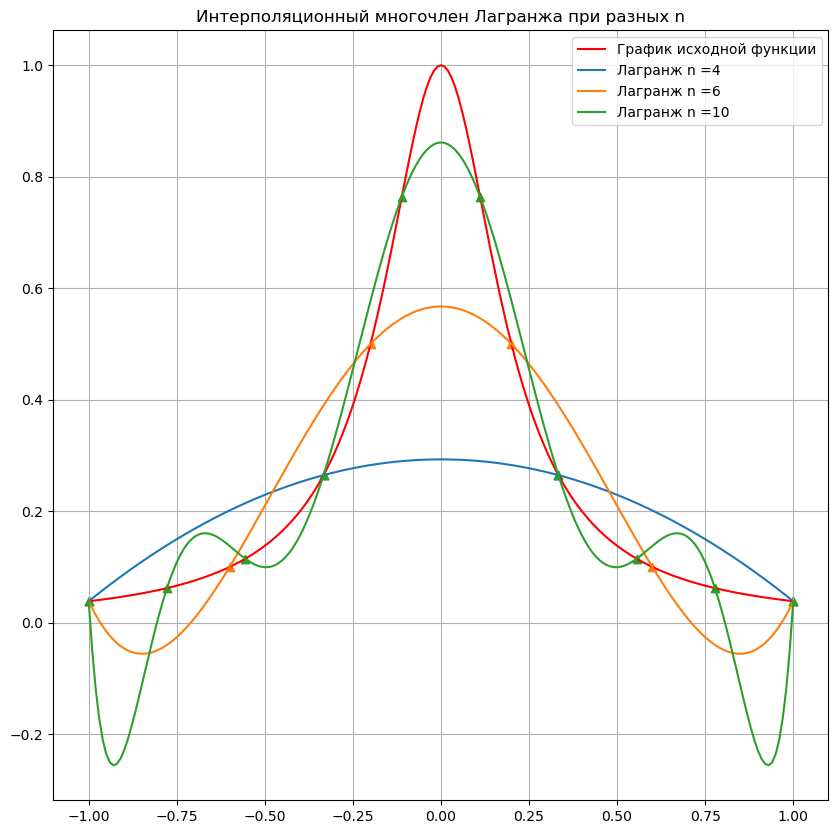

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def Function1(X : float) -> float:
    # Функция из задачи 1
    return 1.0 / (1 + 25 * X * X)

def getl(t : float, k : int, ArgValues : list) -> float:
    # Находит базисную функцию Лагранжа lk(t)
    # ArgValues - массив из n значений аргумента [t0, ... tn]
    n = len(ArgValues)
    lk = 1
    for j in range(n):
        Denom = ArgValues[k] - ArgValues[j]
        lk *= ((t - ArgValues[j]) / Denom) if k != j else 1
    return lk

def getLagrangePolinom(t : float, ArgValues : list, FunctionValues : list) -> float:
    # Возвращает значение полинома Лагранжа в точке t
    n = len(ArgValues)
    Value = 0
    for k in range(n):
        Value += (getl(t, k, ArgValues) * FunctionValues[k])
    return Value

def getLagrangeValues(Args : list, ArgValues : list, FunctionValues : list) -> list:
    # Возвращает массив значений полинома Лагранжа для каждого значения аргумента из Args
    # ArgValues      - массив из n значений аргумента t -- [t0, ... tn]
    # FunctionValues - массив из n значений функции в точках [t0, ... tn]
    Values = []
    for Arg in Args:
        Values.append(getLagrangePolinom(Arg, ArgValues, FunctionValues))
    return Values

def divideSegment(Start : float, Stop : float, N : int) -> float:
    # Возвращает массив из N равноотстоящих точек отрезка [Start, Stop]
    Points = []
    Step = (Stop - Start) / (N - 1)
    for PointNum in range(N):
        Points.append(Start + PointNum * Step)
    return Points

def main():
    StartSegment = -1
    EndSegment = 1
    
    plt.figure(figsize = (10, 10))
    plt.title("Интерполяционный многочлен Лагранжа при разных n")
    
    Args = np.arange(-1, 1.01, 0.01)
    Vals = [Function1(Arg) for Arg in Args]
    plt.plot(Args, Vals, 'r', label = "График исходной функции")
    
    ArrayN = [4, 6, 10]
    
    for N in ArrayN:
        ArgValues = divideSegment(StartSegment, EndSegment, N)
        FunctionValues = []
        for Arg in ArgValues:
            FunctionValues.append(Function1(Arg))
        plt.scatter(ArgValues, FunctionValues, marker = "^")
        Args = np.arange(-1, 1.01, 0.01)
        LagrangeVals = getLagrangeValues(Args, ArgValues, FunctionValues)
        NameGraph = "Лагранж n =" + str(N)
        plt.plot(Args, LagrangeVals, label = NameGraph)

    plt.grid()
    plt.legend()
    plt.savefig("Lagrang.png")
    plt.show()

if __name__ == '__main__':
    main()

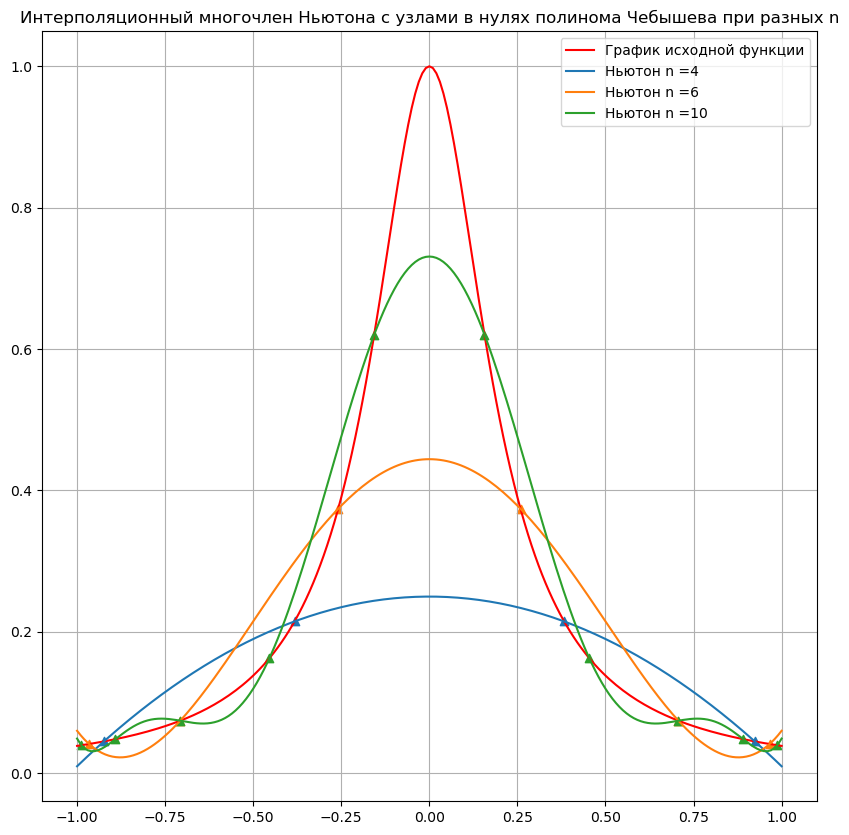

In [3]:
def getF(k : int, n : int, ArgValues : list, FunctionValues : list) -> float:
    # Находит разделенную разность F(tk, ... tn)
    # ArgValues      - массив из n         значений аргумента [t0, ... tn]
    # FunctionValues - массив из n - k + 1 значений функции в точках [tk, ... tn]
    if (k == n):
        return FunctionValues[0]
    F2 = getF(k + 1, n, ArgValues, FunctionValues[1:])
    F1 = getF(k, n - 1, ArgValues, FunctionValues[:-1])
    t2 = ArgValues[n]
    t1 = ArgValues[k]
    DivDiff = (F2 - F1) / (t2 - t1)
    return DivDiff

def getNewtonPolinom(ArgValues : list, FunctionValues : list) -> list:
    # Возвращает коэффициенты интерполяционного полинома Ньютона (разделенные разности)
    n = len(ArgValues)
    DivDiffs = []
    for k in range(n):
        F = getF(0, k, ArgValues, FunctionValues)
        DivDiffs.append(F)
    return DivDiffs
    
def getNewtonValue(t : float, ArgValues : list, NewtonPol : list) -> float:
    # Возвращает значение полинома Ньютона в точке t
    Result = 0
    n = len(ArgValues)
    for k in range(n):
        Mult = 1
        for i in range(k):
            Mult *= (t - ArgValues[i])
        Result += Mult * NewtonPol[k]
    return Result

def getNewtonValues(Args : list, ArgValues : list, FunctionValues : list) -> list:
    # Возвращает масcив значений полинома Ньютона для каждого значения аргумента из Args
    # ArgValues      - массив из n значений аргумента t -- [t0, ... tn]
    # FunctionValues - массив из n значений функции в точках [t0, ... tn]
    NewtonValues = []
    NewtonPol = getNewtonPolinom(ArgValues, FunctionValues)
    for Arg in Args:
        NewtonValues.append(getNewtonValue(Arg, ArgValues, NewtonPol))
    return NewtonValues

def getChebZeros(Start : float, Stop : float, N : int) -> float:
    # Возвращает массив из N нулей полинома Чебышева на отрезке [Start, Stop]
    Zeros = []
    HalfSum = (Start + Stop) / 2.0
    HalfDiff = (Stop - Start) / 2.0
    for ZeroNum in range(1, N + 1):
        Zero = HalfSum + HalfDiff * math.cos((2 * ZeroNum - 1) * math.pi / (2 * N))
        Zeros.append(Zero)
    return Zeros

def main():
    StartSegment = -1
    EndSegment = 1
    
    plt.figure(figsize = (10, 10))
    plt.title("Интерполяционный многочлен Ньютона с узлами в нулях полинома Чебышева при разных n")
    
    Args = np.arange(-1, 1.01, 0.01)
    Vals = [Function1(Arg) for Arg in Args]
    plt.plot(Args, Vals, 'r', label = "График исходной функции")
    
    ArrayN = [4, 6, 10]
    
    for N in ArrayN:
        NewtonArgValues = getChebZeros(StartSegment, EndSegment, N)
        FunctionValues = []
        for Arg in NewtonArgValues:
            FunctionValues.append(Function1(Arg))
        plt.scatter(NewtonArgValues, FunctionValues, marker = "^")
        Args = np.arange(-1, 1.01, 0.01)
        NewtonVals = getNewtonValues(Args, NewtonArgValues, FunctionValues)
        NameGraph = "Ньютон n =" + str(N)
        plt.plot(Args, NewtonVals, label = NameGraph)

    plt.grid()
    plt.legend()
    plt.savefig("NewtonWithCheb.png")
    plt.show()


if __name__ == '__main__':
    main()

#### **Вывод**: Использование нулей полинома Чебышева, значительно повышает точность интерполяции, а именно -- повышает устойчивость полинома при больших n

## **Задача 2**

Написать программу для вычисления интеграла

$$I = \int_{0}^{10} \frac{ln(100 - x)}{10 - \sqrt{x}} dx$$

с помощью квадратурной формулы Гаусса.

1. Программа должна содержать функцию, которая принимает на вход ссылку на функцию f, отрезок [a, b], и число узлов n.

2. Функция должна вычислять узлы квадратуры Гаусса, которые являются нулями полинома Лежандра

3. Функция должна вычислять веса квадратурной формулы через интегралы от базовых многочленов Лагранжа по узлам квадратуры. Для вычисления интегралов необходимо воспользоваться методом численного интегрирования порядка p > 2

4. Функция должна возвращать приближенное значение интеграла, вычисленное по квадратурной формуле Гаусса

5. Программа должна сравнивать значение интеграла с точным

6. Построить кривую зависимости количества узлов от ошибки интегрирования

### **Квадратурная формула Гаусса**

Для приближения значения интеграла удобно использовать квадратурные формулы:

$$I = \int_a^b f(x) dx = \sum_{k=0}^{n-1}c_k f(x_k)$$

, где $$c_k, x_k$$ - *веса* и *узлы* квадратурной формулы

Квадратуры Гаусса записываются в пределах [-1, 1]:

$$I = \int_{-1}^1 f(t) dt = \sum_{k=0}^{n-1}c_k f(t_k)$$

но заменой всех узлов можно свести к интегрированию на [a, b]:

$$x_k = \frac{b + a}{2} + \frac{b - a}{2} t_k$$

Отличие квадратур Гаусса в том, что 

* **Узлы** в этой формуле -- **нули полиномов Лежандра** $$q_n(x), q_n(x_k) = 0, k = 0, ... n-1$$

Они вычисляются итеративно по **методу Ньютона**.

* **Веса** -- **интегралы от базисных функций Лагранжа** $$l_k(x), l_k(x) = \text{П}_{j=0, j!=k}\frac{x - x_j}{x_k - x_j}$$

$$c_k = \int_{-1}^{1} l_k(x)dx$$

Интегралы вычисляются по узлам квадратуры с использованием метода численного интегрирования 4-го порядка аппроксимации (p = 4) -- **метода Симпсона**, который выглядит следующим образом:

$$I_{ki} = \frac{h}{3}(l_k(x_{2i}) + 4l_k(x_{2i+1}) + l_k(x_{2i + 2}))$$

$$c_k = I_k = \sum_{i = 0}^{n-1} I_{ki}$$

, где $$h = x_{2i + 2} - x_{2i}$$ - шаг интегрирования


Точное решение и его ошибка (I, delta I) = (5.816000238979463, 2.8487434633461817e-11)

Метод квадратур Гаусса при N = 2 : I = 5.8174963354

Метод квадратур Гаусса при N = 3 : I = 5.8174991479

Метод квадратур Гаусса при N = 4 : I = 5.8163256473

Метод квадратур Гаусса при N = 5 : I = 5.8158592827

Метод квадратур Гаусса при N = 6 : I = 5.8155380176

Метод квадратур Гаусса при N = 7 : I = 5.8153456953

Метод квадратур Гаусса при N = 8 : I = 5.8152102380

Метод квадратур Гаусса при N = 9 : I = 5.8151164035


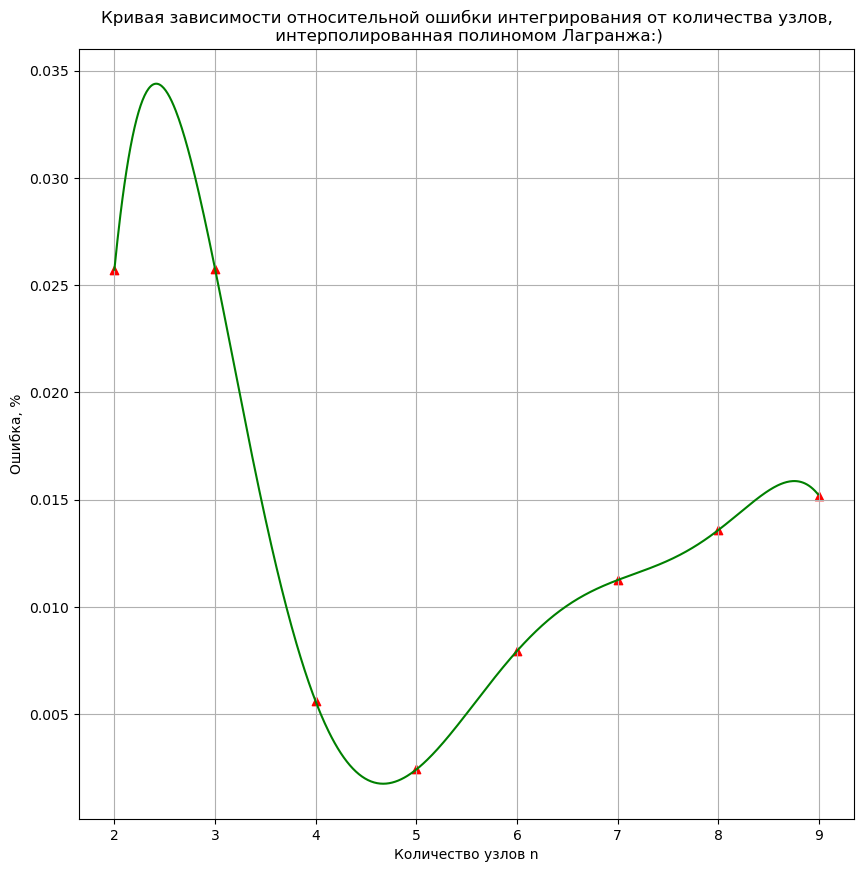

In [45]:
import scipy
from scipy import integrate

def Function2(X : float) -> float:
    # Функция из задания 2
    return math.log(100.0 - X) / (10.0 - math.sqrt(X))

def calculateSimpsonByPoints(Functions : list, a : float, b : float) -> float:
    # Считает интеграл от поточечно заданной функции со значениями Functions[i] на отрезке [a, b] методом Симпсона
    Int = 0
    N = len(Functions)
    k = int(N / 2)
    h = (b - a) / N
    for i in range(1, k):
        F1 = Functions[2*i]
        F2 = Functions[2*i - 1]
        F3 = Functions[2*i - 2]
        Int += h / 3.0 * (F1 + 4 * F2 + F3)
    return Int

def getNextNewtonIteration(Xk : float, P : float, P1 : float) -> float:
    # Возвращает следующий член в итерационном методе Ньютона
    # Процесс представлен следующим итерационным соотношением: X_{k+1} = X_{k} - P(Xk) / Р1(Xk)
    # P - значение полинома Лежандра для Xk
    # P1 - значение произвожной полинома Лежандра для Xk
    return Xk - P / P1

def getLejanPol(X : float, N : int) -> float:
    # Возвращает N-ый полином Лежандра для X
    if (N == 0):
        return 1
    if (N == 1):
        return X
    return (2.0 * N + 1) * X * getLejanPol(X, N - 1) / (N + 1) - N * getLejanPol(X, N - 2) / (N + 1)

def getLejanDerr(X : float, N : int) -> float:
    # Возвращает первую производную N-ного полинома Лежандра для X
    return N * (getLejanPol(X, N - 1) - X * getLejanPol(X, N)) / (1 - X * X)

def getLejanZeros(N : int) -> list:
    # Возвращает N нулей полинома Лежандра
    #, вычисленные итеративно по методу Ньютона с начальным приближением: X0 = cos(pi(4i - 1)/(4N + 2))
    Zeros = []
    Epsilon = 1e-3
    for i in range(1, N + 1):
        Xk = math.cos(math.pi * (4 * i - 1) / (4 * N + 2))
        Xk1 = getNextNewtonIteration(Xk, getLejanPol(Xk, N), getLejanDerr(Xk, N))
        while (abs(Xk - Xk1) > Epsilon):
            Xk = Xk1
            Xk1 = getNextNewtonIteration(Xk, getLejanPol(Xk, N), getLejanDerr(Xk, N))
        Zeros.append(Xk1)
    return Zeros

def changeVars(Start : float, Stop : float, Vars : list) -> list:
    # Делает замену переменных в узлах квадратуры для перехода от интегрирования
    # по [-1, 1] к интегрированию по [a, b]
    HalfSum = (Start + Stop) / 2.0
    HalfDiff = (Stop - Start) / 2.0
    NewVars = [HalfSum + HalfDiff * T for T in Vars]
    return NewVars

def calculateWithGaussQuadrature(F : "function", a : float, b : float, N : int) -> float:
    # Считает интеграл от F на отрезке [a, b] методом квадратур Гаусса по N узлам
    Int = 0
    NodesT = getLejanZeros(N)
    NodesX = changeVars(a + 1e-1, b, NodesT)
    for k in range(1, N + 1):
        # Интегрирование методом Симпсона по 1000 точкам
        Args = np.arange(a, b, 0.001)
        BaseLagranValues = [getl(i, k - 1, NodesX) for i in Args]
        Ck = calculateSimpsonByPoints(BaseLagranValues, a, b)
        Fk = F(NodesX[k - 1])
        Int += Ck * Fk
    return Int
    

def main():
    StartSegment = 0
    EndSegment = 10
    
    ArrayN = np.arange(2, 10)
    Errors =[]
    
    Exact = scipy.integrate.quad(Function2, StartSegment, EndSegment)
    print("Точное решение и его ошибка (I, delta I) =", Exact)
    
    for N in ArrayN:
        Gauss = calculateWithGaussQuadrature(Function2, StartSegment, EndSegment, N)
        print("\nМетод квадратур Гаусса при N =", N, ": I =", format(Gauss, '.10f'))
        Errors.append(abs(Gauss - Exact[0]) * 100 / Exact[0])

    plt.figure(figsize = (10, 10))
    plt.title("Кривая зависимости относительной ошибки интегрирования от количества узлов,\n интерполированная полиномом Лагранжа:)")
    plt.scatter(ArrayN, Errors, marker = '^', color = 'r')
    Args = np.arange(min(ArrayN), max(ArrayN), 0.01)
    NewtonVals = getLagrangeValues(Args, ArrayN, Errors)
    plt.plot(Args, NewtonVals, color = 'g')
    plt.xlabel('Количество узлов n')
    plt.ylabel('Ошибка, %')
    plt.grid()
    plt.savefig("Gauss.png")
    plt.show()


if __name__ == '__main__':
    main()

#### **Вывод**: В данной задаче ошибка интегрирования достигает минимума на n = 5 узлах, дальше только возрастает, что связано с неустойчивостью полиномов Лежандра при больших n

## **Задача 3**


Решить интегральное уравнение вида

$$g(x)u(x) - \lambda  \int_a^b K(x, s)u(s)ds = f(x)$$

используя квадратурную формулу Гаусса. Получить значение функции u(x) в точке x0 > b с максимально возможной точностью.

1. Рассмотреть случай $$g(x) = 1, \lambda = −1, K(x, s) = \frac{0.2}{(0.04 + (x − s)^2)}, f (x) = cos(\pi x), a = −1, b = 1.$$

2. Программа должна принимать на вход число узлов n.

3. Функция должна вычислять веса квадратурной формулы через интегралы от базовых многочленов Лагранжа по узлам квадратуры, при это считать шаг между узлами постоянным $$(x_i − x_{i−1} = s_j − s_{j−1} = h = Const)$$. Для вычисления интегралов необходимо воспользоватьсяметодом численного интегрирования порядка p ≥ 2. 

4. Программа должна решать систему линейных уравнений, решением которой будет вектор значений u(xi), i = 1 . . . n.

5. Программа должна счиать интерполяционный многолен по известным значениям $$x_i, u(x_i)$$, где i = 1 . . . n, строить его график и, который получает значение функции u(x) в точке x0 = 1.1, 1.25, 1.5 с максимально возможной точностью.


**Искомая функция $$u(x)$$** для подсчета интеграла должна быть определена на [-1, 1], поэтому построим **СЛАУ для n точек xk**, k = 0, ... n-1 c одинаковым шагом h и решим ее относительно вектор-функции $$\vec{u(x)} = (u(x_0), u(x_1), ... u(x_{n-1}))^T$$, затем можно по значениям функции в каждой из этих точек построить интерполяционный многочлен, например, в форме Лагранжа или Ньютона

Для этого интеграл также разобьем на n слагаемых по квадратурной формуле Гаусса, тогда получим систему:

$$g(x_0)u(x_0) - \lambda \sum_{i = 0}^{n-1} c_i K(x_0, s_i) u(s_i) = f(x_0)$$
$$g(x_1)u(x_1) - \lambda \sum_{i = 0}^{n-1} c_i K(x_1, s_i) u(s_i) = f(x_1)$$
$$...$$
$$g(x_{n-1})u(x_{n-1}) - \lambda \sum_{i = 0}^{n-1} c_i K(x_{n-1}, s_i) u(s_i) = f(x_{n-1})$$

, где $$s_i = x_i, u(s_i) = u(x_i)$$, тогда получим **СЛАУ**:

$$A\vec{u(x)} = \vec{F}$$

с очевидной матрицей **A**:

$$\begin{pmatrix}
  g(x_0)-\lambda c_0 K(x_0, s_0)& -\lambda c_1 K(x_0, s_1)& ... &-\lambda c_{n-1} K(x_0, s_{n-1})\\
  -\lambda c_0 K(x_1, s_0)& g(x_1)-\lambda c_1 K(x_1, s_1)& ... &-\lambda c_{n-1} K(x_1, s_{n-1})\\
  ...& ...& ... &...\\
  -\lambda c_0 K(x_{n-1}, s_0)& -\lambda c_1 K(x_{n-1}, s_1)& ... &g(x_{n-1})-\lambda c_{n-1} K(x_{n-1}, s_{n-1})
\end{pmatrix}$$

и столбцом правых частей **F**:

$$\begin{pmatrix}
  f(x_0)\\
  f(x_1)\\
  ...\\
  f(x_{n-1})
\end{pmatrix}$$

После решения этой системы можем построить таблицу для функции u(x):

$$u(x)$$ | $$u(x_0)$$ | $$u(x_1)$$ | ... | $$u(x_{n-1})$$ 
------|:--------:|------|:---------|:--------:|
x    | $$x_0$$     | $$x_1$$  | ... | $$x_{n-1}$$ 

Но проблема в том, что интерполяционные полиномы пригодны только **между узлами** и если требуется найти значение функции в точке $$X_0 > b$$, то необходимо **продлить интерполяцию** на необходимое целое число шагов сетки k, так чтобы выполнялось:

$$x_{n + k -1} > X_0$$

необходимое k может быть получено из очевидного соотношения:

$$k = [(X_0 - b) / h] + 1$$

, тогда матрица и столбец свободных членов дополнятся k строками:

**A**:

$$\begin{pmatrix}
  g(x_0)-\lambda c_0 K(x_0, s_0)& ... &-\lambda c_{n-1} K(x_0, s_{n-1})&0&0&...&0\\
  -\lambda c_0 K(x_1, s_0)& ... &-\lambda c_{n-1} K(x_1, s_{n-1})&0&0&...&0\\
  ...& ...& ... &...&...&...&...\\
  -\lambda c_0 K(x_{n-1}, s_0)& ... &g(x_{n-1})-\lambda c_{n-1} K(x_{n-1}, s_{n-1})&0&0&...&0\\
  -\lambda c_0 K(x_{n}, s_0)& ... &-\lambda c_{n-1} K(x_{n}, s_{n-1})&g(x_n)&0&...&0\\
  -\lambda c_0 K(x_{n+1}, s_0)& ... &-\lambda c_{n-1} K(x_{n+1}, s_{n-1})&0&g(x_{n+1})&...&0\\
  ...& ...& ... &...&...&...&...\\
  -\lambda c_0 K(x_{n+k-1}, s_0)& ... &-\lambda c_{n-1} K(x_{n+k-1}, s_{n-1})&0&0&...&g(x_{n+k-1})\\
\end{pmatrix}$$

**F**:

$$\begin{pmatrix}
  f(x_0)\\
  f(x_1)\\
  ...\\
  f(x_{n-1})\\
  ...\\
  f(x_{n+k-1})
\end{pmatrix}$$

После решения этой системы, например методом LU-разложения из прошлого задания, можем построить таблицу для функции u(x):

$$u(x)$$ | $$u(x_0)$$ | $$u(x_1)$$ | ... | $$u(x_{n+k-1})$$ 
------|:--------:|------|:---------|:--------:|
x    | $$x_0$$     | $$x_1$$  | ... | $$x_{n+k-1}$$ 

И уже с ее помощью построить интерполяционный многочлен в **форме Ньютона** $$N(x)$$, по которому затем вычислить значение u(x) в нужных точках.



Значения в точках с помощью построения полинома по n = 3 узлам:

X0 = 1.1 , u(X0) = -0.3826 

X0 = 1.25 , u(X0) = -0.3330 

X0 = 1.5 , u(X0) = -0.1116 



Значения в точках с помощью построения полинома по n = 4 узлам:

X0 = 1.1 , u(X0) = -0.4055 

X0 = 1.25 , u(X0) = -0.3693 

X0 = 1.5 , u(X0) = -0.0028 



Значения в точках с помощью построения полинома по n = 5 узлам:

X0 = 1.1 , u(X0) = -0.6991 

X0 = 1.25 , u(X0) = -0.5593 

X0 = 1.5 , u(X0) = 0.0378 



Значения в точках с помощью построения полинома по n = 6 узлам:

X0 = 1.1 , u(X0) = -0.4434 

X0 = 1.25 , u(X0) = -0.3955 

X0 = 1.5 , u(X0) = 0.0268 



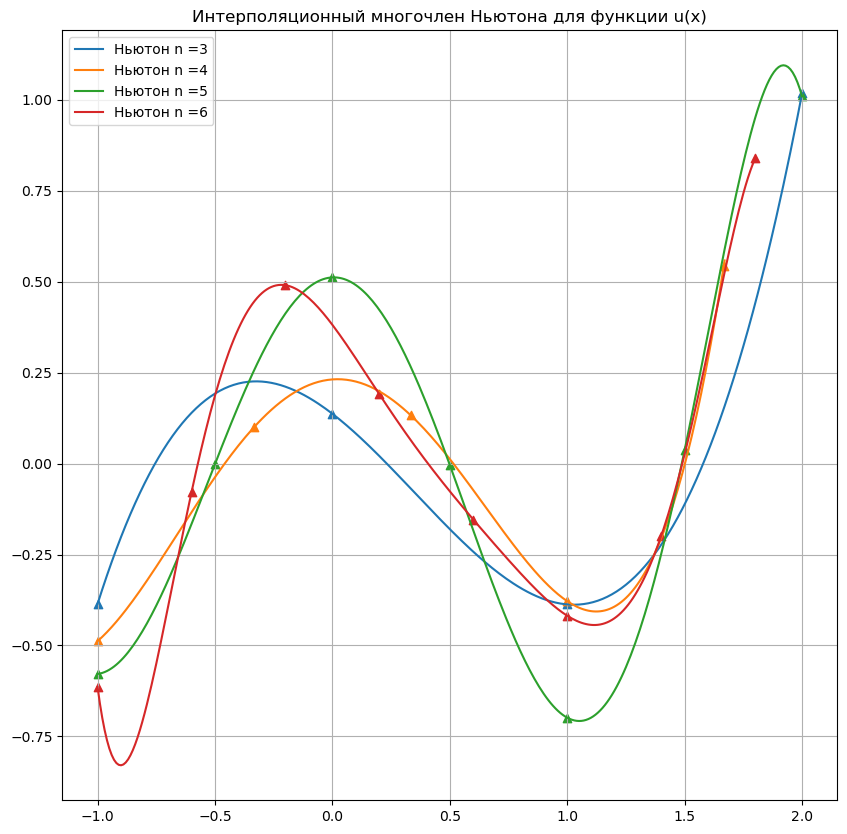

In [33]:
def g(X : float) -> float:
    return 1

def f(X : float) -> float:
    return math.cos(X * math.pi)

def K(X : float, S : float) -> float:
    return 0.2 / (0.04 + (X - S)**2)

def calculateTrapezoidByPoints(Functions : list, a : float, b : float) -> float:
    # Считает интеграл от поточечно заданной функции со значениями Functions[i] на отрезке [a, b] методом трапеций
    Int = 0
    N = len(Functions)
    h = (b - a) / N
    for i in range(1, N):
        F1 = Functions[i]
        F2 = Functions[i - 1]
        Int += h / 2.0 * (F1 + F2)
    return Int

def LUdecomposition(A : list) -> (list, list):
    # Разложение матрицы в произведение  A = LU
    # U - верхнетреугольная, L - нижнетреугольная
    N = len(A)
    L = np.zeros(shape = (N, N))
    U = A
    for i in range(N):
        for j in range(i, N):
            L[j][i] = U[j][i] * 1.0 / U[i][i]

    for k in range(1, N):
        for i in range(k-1, N):
            for j in range(i, N):
                L[j][i] = U[j][i] * 1.0 / U[i][i]
        for i in range(k, N):
            for j in range(k-1, N):
                U[i][j] = U[i][j] - L[i][k-1] * U[k-1][j]
    return (L, U)

def solveU(U : list, F : list) -> list:
    # Решает СЛАУ UX = F
    # U - верхнетреугольная матрица
    N = len(U)
    Solution = np.zeros(N)
    Solution[N - 1] = F[N - 1, 0] * 1.0 / U[N - 1][N - 1]
    for n in range(N - 2, -1, -1):
        Sum = 0
        for i in range(n + 1, N):
            Sum += U[n][i] * Solution[i]
        Solution[n] = (F[n, 0] - Sum) / U[n][n]
    return Solution

def getSolution(Matrix : list, F : list) -> list:
    # Решает СЛАУ
    N = len(Matrix)
    L, U = LUdecomposition(Matrix)
    F = np.dot(np.linalg.inv(L), F)
    return solveU(U, F)

def getFunctionValues(Kfunc : "function", g : "function", f : "function", Lambda : float, a : float, b : float, N : int, ArrayX0 : list) -> (list, list):
    # Возвращает 
    # Nodes    - массив из N + k точек xk, полученных равным делением отрезка [a, b] на N - 1 частей и дополненный k точками
    # FunctionValues - массив значений функции u(x) в этих точках
    
    # 1. Делим отрезок на N-1 частей
    Nodes = divideSegment(a, b, N)
    
    # 2. Дополняем его так, чтобы масимальное из X0 попадало внутрь интервала интерполяции
    h = (b - a) / (N - 1)
    K = int((max(ArrayX0) - b) / h) + 1
    AddNodes = [b + i * h for i in range(1, K + 1)]
    Nodes += AddNodes
    
    # 3. Ищем веса Weights квадратурной формулы, интегрируя базовые многочлены Лагранжа
    Weights = []
    for k in range(1, N + 1):
        # Интегрирование методом трапеций по 1000 точкам
        Args = np.arange(a, b, 0.001)
        BaseLagranValues = [getl(i, k - 1, Nodes) for i in Args]
        Weights.append(calculateSimpsonByPoints(BaseLagranValues, a, b))
        
    # 4. Получаем матрицу СЛАУ Matrix и столбец правых частей F
    Matrix = np.zeros(shape = (N + K, N + K))
    for i in range(N + K):
        for j in range(N + K):
            if (j < N):
                Matrix[i, j] = -Lambda * Weights[j] * Kfunc(Nodes[i], Nodes[j])
    for i in range(N + K):
        Matrix[i][i] += g(Nodes[i])
        
    F = np.zeros(shape = (N + K, 1))
    for i in range(N + K):
        F[i, 0] = f(Nodes[i])
        
    # 5. Решаем СЛАУ
    FunctionValues = getSolution(Matrix, F)
    
    return Nodes, FunctionValues

def getFunctionValue(X0 : float, ArgValues : list, FunctionValues : list) -> float:
    NumArg = 0
    while (ArgValues[NumArg] < X0):
        NumArg += 1
    return FunctionValues[NumArg]
    
        
def main():
    a = -1
    b = 1
    Lambda = -1
    # Число узлов
    ArrayN = [3, 4, 5, 6]
    # Точки, в которых хотим получить значение u(x)
    ArrayX0 = [1.1, 1.25, 1.5]
    
    plt.figure(figsize = (10, 10))
    plt.title("Интерполяционный многочлен Ньютона для функции u(x)")
    
    for N in ArrayN:
        ArgValues, FunctionValues = getFunctionValues(K, g, f, Lambda, a, b, N, ArrayX0)
        plt.scatter(ArgValues, FunctionValues, marker = "^")
        Args = np.arange(-1, max(ArgValues) + 0.01, 0.01)
        NewtonVals = getNewtonValues(Args, ArgValues, FunctionValues)
        print("\n\nЗначения в точках с помощью построения полинома по n =", N, "узлам:\n")
        for X0 in ArrayX0:
            print("X0 =", X0, ", u(X0) =", format(getFunctionValue(X0, Args, NewtonVals), '.4f'), "\n")
        
        NameGraph = "Ньютон n =" + str(N)
        plt.plot(Args, NewtonVals, label = NameGraph)

    plt.grid()
    plt.legend()
    plt.show()


if __name__ == '__main__':
    main()

#### Средние значения для значений функции
x    | 1.1  | 1.25 | 1.5 
------|:--------:|------|:--------:|
$$u(x)$$ | -0.48 | -0.42 | -0.01